# This notebook is for Autoencoder model results on train & two test sets (normal & faulty vehicle) for smooth road surface

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import csv

import tensorflow as tf
from keras.layers import Input, Dropout
from keras.layers import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

# Import and read train (subset of Feb - normal vehicle) set

In [146]:
data_vib1 = pd.read_csv("Input_Data_Files/SmoothDataTrain.csv", index_col=0)
data_vib1

,FR_LH [m/s2],FR_RH [m/s2],RR_LH [m/s2],RR_RH [m/s2],Cabin [m/s2]
DateTime,,,,,
2020-02-25 16:44:05.545,0.100473,0.292175,-1.257048,-2.306725,0.057444
2020-02-25 16:44:05.550,0.751109,0.805315,-1.192182,-2.509827,-0.368753
2020-02-25 16:44:05.555,-0.395714,-0.780379,-1.384547,-2.121707,-1.137764
2020-02-25 16:44:05.560,-1.351551,-0.489236,-1.609597,-2.620094,-0.982462
2020-02-25 16:44:05.565,-0.074189,-0.203695,-1.431848,-2.502993,0.066187
...,...,...,...,...,...
2020-02-25 15:22:49.850,0.165165,-0.074006,-0.535016,1.069233,0.866391
2020-02-25 15:22:49.855,-0.223721,0.647041,-0.746756,0.860075,0.863193
2020-02-25 15:22:49.860,0.817461,0.130095,-0.769459,0.078495,0.577989


# Smoothing of raw train data to reduce noise by rolling mean

In [8]:
data_vib1['Roll_Mean_FR_LH [m/s2]'] = data_vib1[['FR_LH [m/s2]']].rolling(500).mean()
data_vib1['Roll_Mean_FR_RH [m/s2]'] = data_vib1[['FR_RH [m/s2]']].rolling(500).mean()
data_vib1['Roll_Mean_RR_LH [m/s2]'] = data_vib1[['RR_LH [m/s2]']].rolling(500).mean()
data_vib1['Roll_Mean_RR_RH [m/s2]'] = data_vib1[['RR_RH [m/s2]']].rolling(500).mean()
data_vib1['Roll_Mean_Cabin [m/s2]'] = data_vib1[['Cabin [m/s2]']].rolling(500).mean()
data_vib1

C:\Users\Khyati.Thakkar\AppData\Local\Temp\ipykernel_13632\3629872678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vib1['Roll_Mean_FR_LH [m/s2]'] = data_vib1[['FR_LH [m/s2]']].rolling(500).mean()
C:\Users\Khyati.Thakkar\AppData\Local\Temp\ipykernel_13632\3629872678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_vib1['Roll_Mean_FR_RH [m/s2]'] = data_vib1[['FR_RH [m/s2]']].rolling(500).mean()
C:\Users\Khyati.Thakkar\AppData\Local\Temp\ipykernel_13632\3629872678.py:3: SettingWithCopyWarni

,FR_LH [m/s2],FR_RH [m/s2],RR_LH [m/s2],RR_RH [m/s2],Cabin [m/s2],Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
DateTime,,,,,,,,,,
2020-02-25 16:44:05.545,0.100473,0.292175,-1.257048,-2.306725,0.057444,NaN,NaN,NaN,NaN,NaN
2020-02-25 16:44:05.550,0.751109,0.805315,-1.192182,-2.509827,-0.368753,NaN,NaN,NaN,NaN,NaN
2020-02-25 16:44:05.555,-0.395714,-0.780379,-1.384547,-2.121707,-1.137764,NaN,NaN,NaN,NaN,NaN
2020-02-25 16:44:05.560,-1.351551,-0.489236,-1.609597,-2.620094,-0.982462,NaN,NaN,NaN,NaN,NaN
2020-02-25 16:44:05.565,-0.074189,-0.203695,-1.431848,-2.502993,0.066187,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-02-25 15:22:49.850,0.165165,-0.074006,-0.535016,1.069233,0.866391,0.239965,0.150913,-0.526242,0.803403,0.146499
2020-02-25 15:22:49.855,-0.223721,0.647041,-0.746756,0.860075,0.863193,0.238243,0.151375,-0.527253,0.802899,0.146162
2020-02-25 15:22:49.860,0.817461,0.130095,-0.769459,0.078495,0.577989,0.240175,0.151410,-0.528712,0.800829,0.143770


In [9]:
data_vib1 = data_vib1.iloc[499:,5:10]
data_vib1

,Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
DateTime,,,,,
2020-02-25 16:44:08.040,0.090035,0.025360,0.334546,-0.595466,-0.082514
2020-02-25 16:44:08.045,0.088738,0.026569,0.337461,-0.592929,-0.085148
2020-02-25 16:44:08.050,0.088542,0.026965,0.338969,-0.587910,-0.083392
2020-02-25 16:44:08.055,0.091458,0.027453,0.341043,-0.584220,-0.078838
2020-02-25 16:44:08.060,0.094023,0.026300,0.344239,-0.579647,-0.079269
...,...,...,...,...,...
2020-02-25 15:22:49.850,0.239965,0.150913,-0.526242,0.803403,0.146499
2020-02-25 15:22:49.855,0.238243,0.151375,-0.527253,0.802899,0.146162
2020-02-25 15:22:49.860,0.240175,0.151410,-0.528712,0.800829,0.143770


In [10]:
data_vib1.describe()

,Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
count,105429.000000,105429.000000,105429.000000,105429.000000,105429.000000
mean,0.570569,0.261507,-0.122946,0.306421,0.042369
std,0.552687,0.176143,0.650052,0.825881,0.106427
min,0.016724,0.008021,-0.865834,-1.151640,-0.210512
25%,0.260426,0.162296,-0.686900,-0.530139,-0.045133
50%,0.358729,0.200896,-0.488854,0.757922,0.023250
75%,0.697109,0.335693,0.409817,1.073679,0.134537
max,2.021136,0.755864,1.156477,1.301288,0.293399


# Training Data Visualization

array([<AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>, <AxesSubplot:xlabel='DateTime'>,
       <AxesSubplot:xlabel='DateTime'>], dtype=object)

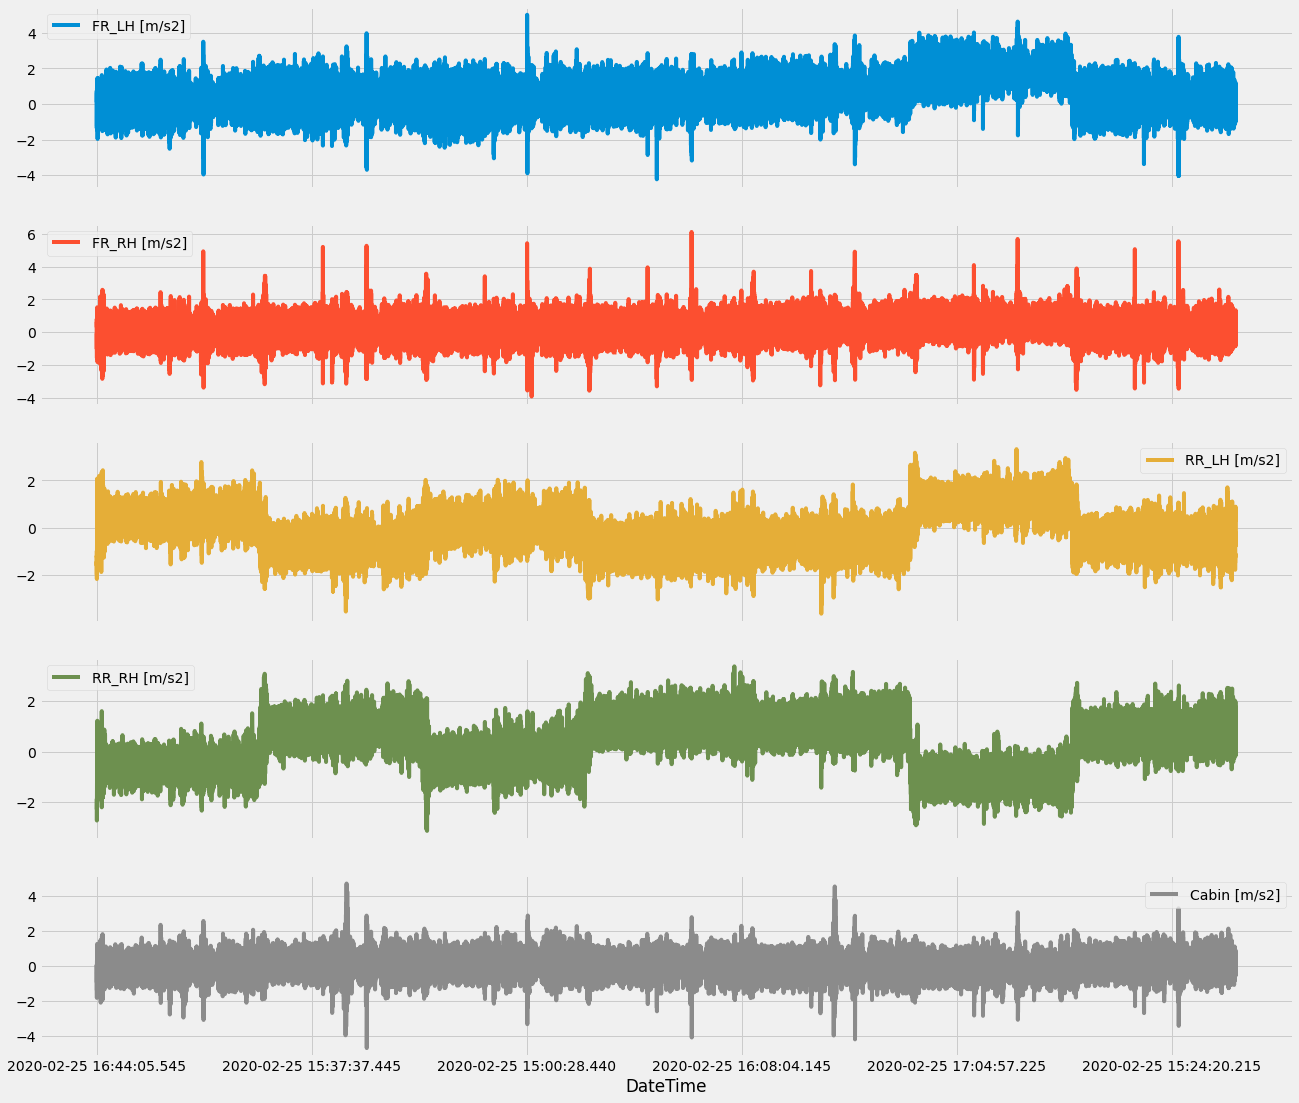

In [147]:
plt.style.use('fivethirtyeight')
data_vib1.plot(figsize=(20,18), subplots=True)

In [12]:
columns = data_vib1.columns
columns

Index(['Roll_Mean_FR_LH [m/s2]', 'Roll_Mean_FR_RH [m/s2]',
       'Roll_Mean_RR_LH [m/s2]', 'Roll_Mean_RR_RH [m/s2]',
       'Roll_Mean_Cabin [m/s2]'],
      dtype='object')

In [13]:
data_train=data_vib1.values
print(data_train)

[[ 0.09003496  0.02535954  0.33454645 -0.59546598 -0.08251381]
 [ 0.08873831  0.02656884  0.33746094 -0.5929285  -0.08514821]
 [ 0.08854182  0.02696478  0.33896852 -0.58791003 -0.0833915 ]
 ...
 [ 0.24017481  0.15140977 -0.52871163  0.80082923  0.14377038]
 [ 0.24152886  0.15329406 -0.52957114  0.79879905  0.14132061]
 [ 0.23984158  0.15181692 -0.52905769  0.79646571  0.1408047 ]]


# Import and read test 1 (subset of Feb - normal vehicle) set

In [148]:
data_test1 = pd.read_csv("Input_Data_Files/SmoothDataTest_Feb.csv", index_col=0)
data_test1

,FR_LH [m/s2],FR_RH [m/s2],RR_LH [m/s2],RR_RH [m/s2],Cabin [m/s2]
DateTime,,,,,
2020-02-25 15:03:04.425,-0.757349,-0.709606,-0.639939,-0.808832,-0.829674
2020-02-25 15:03:04.430,0.619478,0.428583,-0.492601,-0.478179,0.005857
2020-02-25 15:03:04.435,1.745396,1.014770,-0.729361,-1.484268,0.453091
2020-02-25 15:03:04.440,0.062191,-0.080798,-0.539860,-0.560732,-0.123652
2020-02-25 15:03:04.445,-0.224184,-0.766837,-0.430473,-0.779751,-0.589203
...,...,...,...,...,...
2020-02-25 17:07:15.915,2.039397,1.363934,1.001291,-1.255134,-0.415626
2020-02-25 17:07:15.920,2.298627,-0.070626,0.328625,-1.718490,-0.268216
2020-02-25 17:07:15.925,1.452066,0.761699,1.373090,-1.387942,0.476310


# Smoothing of raw test 1 data to reduce noise by rolling mean

In [60]:
data_test1['Roll_Mean_FR_LH [m/s2]'] = data_test1[['FR_LH [m/s2]']].rolling(500).mean()
data_test1['Roll_Mean_FR_RH [m/s2]'] = data_test1[['FR_RH [m/s2]']].rolling(500).mean()
data_test1['Roll_Mean_RR_LH [m/s2]'] = data_test1[['RR_LH [m/s2]']].rolling(500).mean()
data_test1['Roll_Mean_RR_RH [m/s2]'] = data_test1[['RR_RH [m/s2]']].rolling(500).mean()
data_test1['Roll_Mean_Cabin [m/s2]'] = data_test1[['Cabin [m/s2]']].rolling(500).mean()
data_test1

,FR_LH [m/s2],FR_RH [m/s2],RR_LH [m/s2],RR_RH [m/s2],Cabin [m/s2],Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
DateTime,,,,,,,,,,
2020-02-25 15:03:04.425,-0.757349,-0.709606,-0.639939,-0.808832,-0.829674,NaN,NaN,NaN,NaN,NaN
2020-02-25 15:03:04.430,0.619478,0.428583,-0.492601,-0.478179,0.005857,NaN,NaN,NaN,NaN,NaN
2020-02-25 15:03:04.435,1.745396,1.014770,-0.729361,-1.484268,0.453091,NaN,NaN,NaN,NaN,NaN
2020-02-25 15:03:04.440,0.062191,-0.080798,-0.539860,-0.560732,-0.123652,NaN,NaN,NaN,NaN,NaN
2020-02-25 15:03:04.445,-0.224184,-0.766837,-0.430473,-0.779751,-0.589203,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-02-25 17:07:15.915,2.039397,1.363934,1.001291,-1.255134,-0.415626,1.954946,0.675323,1.154893,-1.074173,-0.164581
2020-02-25 17:07:15.920,2.298627,-0.070626,0.328625,-1.718490,-0.268216,1.956011,0.674325,1.152486,-1.074476,-0.164448
2020-02-25 17:07:15.925,1.452066,0.761699,1.373090,-1.387942,0.476310,1.956654,0.676149,1.154036,-1.075107,-0.162662


In [61]:
data_test1 = data_test1.iloc[499:,5:10]
data_test1

,Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
DateTime,,,,,
2020-02-25 15:03:06.920,0.418037,0.171161,0.036688,-0.140819,0.103250
2020-02-25 15:03:06.925,0.419236,0.169047,0.037881,-0.138655,0.104039
2020-02-25 15:03:06.930,0.418858,0.167207,0.039480,-0.135629,0.101234
2020-02-25 15:03:06.935,0.414717,0.168587,0.041881,-0.130413,0.100296
2020-02-25 15:03:06.940,0.413431,0.168701,0.044628,-0.128043,0.101676
...,...,...,...,...,...
2020-02-25 17:07:15.915,1.954946,0.675323,1.154893,-1.074173,-0.164581
2020-02-25 17:07:15.920,1.956011,0.674325,1.152486,-1.074476,-0.164448
2020-02-25 17:07:15.925,1.956654,0.676149,1.154036,-1.075107,-0.162662


In [62]:
data_test1.describe()

,Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
count,120010.000000,120010.000000,120010.000000,120010.000000,120010.000000
mean,0.769540,0.314991,-0.026955,0.169804,0.043962
std,0.512247,0.151570,0.652222,0.770529,0.115786
min,0.219889,0.097881,-0.831640,-1.150707,-0.217238
25%,0.427996,0.218186,-0.679347,-0.280650,-0.053269
50%,0.535113,0.257508,-0.075467,0.153480,0.076698
75%,0.948396,0.369324,0.333563,0.905831,0.141617
max,2.110772,0.783366,1.207292,1.310556,0.288620


# Test 1 Data Visualization

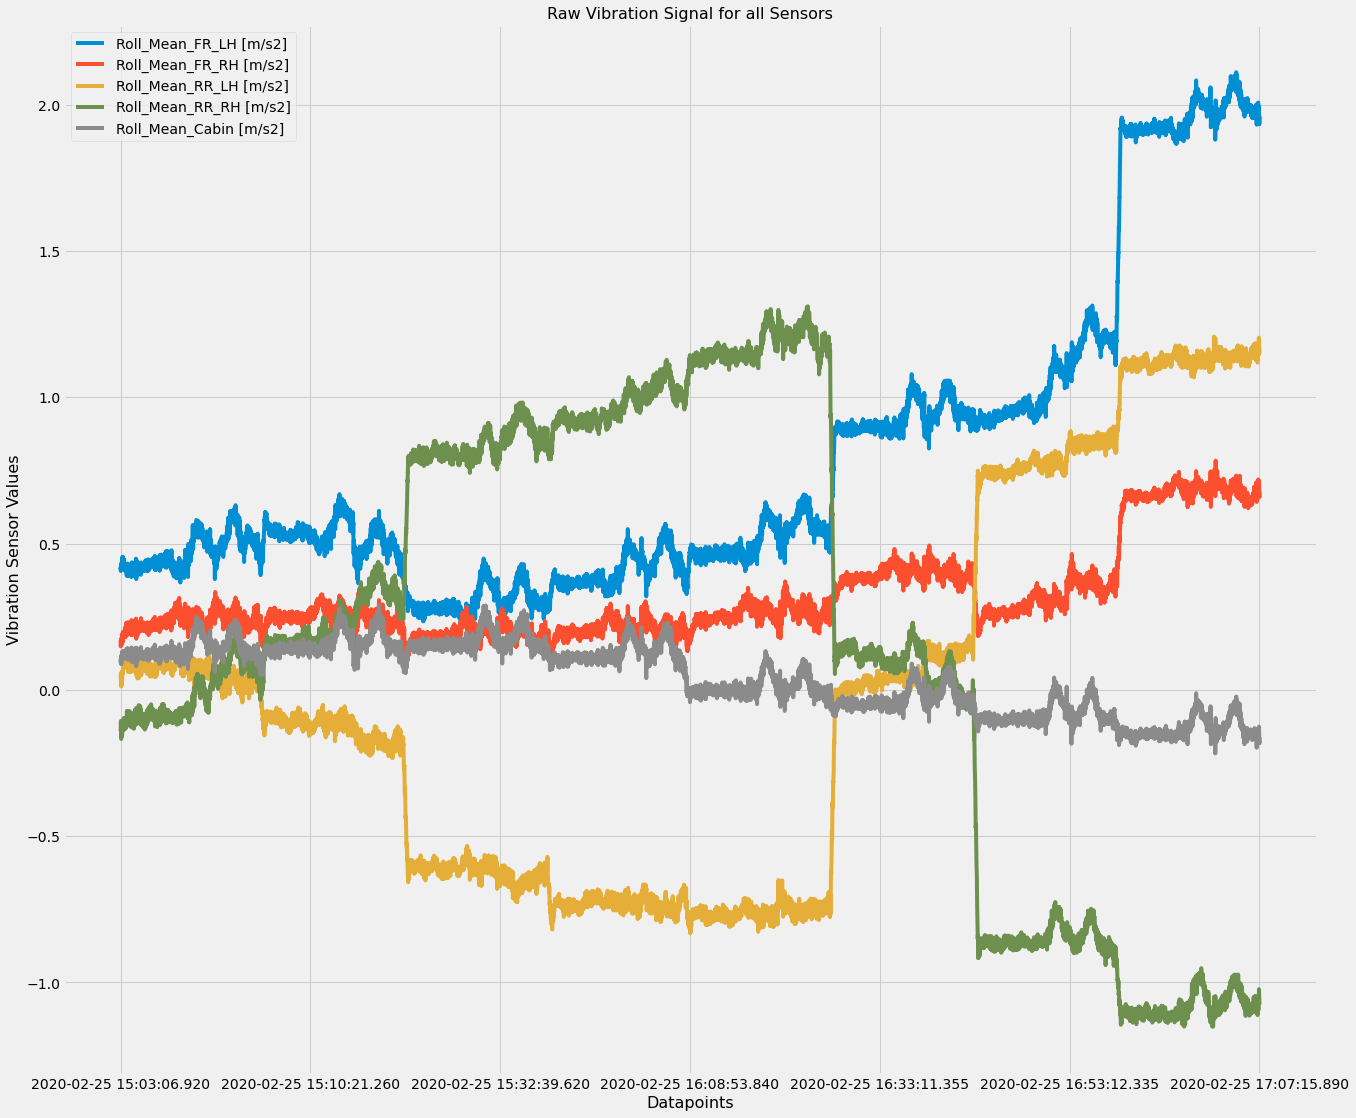

In [63]:
plt.style.use('fivethirtyeight')
ax = data_test1.plot(figsize=(20,18), subplots=False)
ax.set_xlabel('Datapoints', fontsize=16)
ax.set_ylabel('Vibration Sensor Values', fontsize=16)
ax.set_title('Raw Vibration Signal for all Sensors', fontsize=16)
plt.show()

In [65]:
data_test_feb_columns = data_test1.columns
data_test_feb_columns

Index(['Roll_Mean_FR_LH [m/s2]', 'Roll_Mean_FR_RH [m/s2]',
       'Roll_Mean_RR_LH [m/s2]', 'Roll_Mean_RR_RH [m/s2]',
       'Roll_Mean_Cabin [m/s2]'],
      dtype='object')

In [66]:
data_test_feb=data_test1.values
print(data_test_feb)

[[ 0.41803746  0.17116125  0.03668814 -0.14081867  0.10325018]
 [ 0.41923625  0.16904733  0.03788117 -0.13865543  0.10403898]
 [ 0.41885814  0.16720672  0.03948049 -0.1356292   0.10123437]
 ...
 [ 1.95665434  0.67614868  1.15403632 -1.07510657 -0.16266181]
 [ 1.95784728  0.67596041  1.1536793  -1.07505942 -0.1617072 ]
 [ 1.95971458  0.67719825  1.15341832 -1.07580484 -0.16132603]]


# Import and read test 2 (subset of March - faulty vehicle) set

In [149]:
data_test2 = pd.read_csv("Input_Data_Files/SmoothDataTest_March.csv", index_col=0)
data_test2

,FR_LH [m/s2],FR_RH [m/s2],RR_LH [m/s2],RR_RH [m/s2],Cabin [m/s2]
DateTime,,,,,
2020-03-11 00:23:26.475,1.569116,1.620959,1.462681,0.621480,-0.145208
2020-03-11 00:23:26.480,2.229439,1.474553,0.974797,0.411229,0.519631
2020-03-11 00:23:26.485,1.477048,1.210215,1.156211,0.189476,0.161719
2020-03-11 00:23:26.490,0.724111,0.257499,0.134365,0.323146,-1.022316
2020-03-11 00:23:26.495,1.327011,1.677164,1.347017,0.607833,-0.059998
...,...,...,...,...,...
2020-03-11 23:49:43.450,3.982546,1.427715,1.099390,-2.288873,-0.523992
2020-03-11 23:49:43.455,4.525944,1.323940,1.466303,-2.656870,-0.457494
2020-03-11 23:49:43.460,5.099996,2.054907,0.921557,-2.332442,-0.404743


# Smoothing of raw test 2 data to reduce noise by rolling mean

In [68]:
data_test2['Roll_Mean_FR_LH [m/s2]'] = data_test2[['FR_LH [m/s2]']].rolling(500).mean()
data_test2['Roll_Mean_FR_RH [m/s2]'] = data_test2[['FR_RH [m/s2]']].rolling(500).mean()
data_test2['Roll_Mean_RR_LH [m/s2]'] = data_test2[['RR_LH [m/s2]']].rolling(500).mean()
data_test2['Roll_Mean_RR_RH [m/s2]'] = data_test2[['RR_RH [m/s2]']].rolling(500).mean()
data_test2['Roll_Mean_Cabin [m/s2]'] = data_test2[['Cabin [m/s2]']].rolling(500).mean()
data_test2

,FR_LH [m/s2],FR_RH [m/s2],RR_LH [m/s2],RR_RH [m/s2],Cabin [m/s2],Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
DateTime,,,,,,,,,,
2020-03-11 00:23:26.475,1.569116,1.620959,1.462681,0.621480,-0.145208,NaN,NaN,NaN,NaN,NaN
2020-03-11 00:23:26.480,2.229439,1.474553,0.974797,0.411229,0.519631,NaN,NaN,NaN,NaN,NaN
2020-03-11 00:23:26.485,1.477048,1.210215,1.156211,0.189476,0.161719,NaN,NaN,NaN,NaN,NaN
2020-03-11 00:23:26.490,0.724111,0.257499,0.134365,0.323146,-1.022316,NaN,NaN,NaN,NaN,NaN
2020-03-11 00:23:26.495,1.327011,1.677164,1.347017,0.607833,-0.059998,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 23:49:43.450,3.982546,1.427715,1.099390,-2.288873,-0.523992,5.111971,1.890130,1.499991,-2.103966,-0.277490
2020-03-11 23:49:43.455,4.525944,1.323940,1.466303,-2.656870,-0.457494,5.109145,1.888646,1.500641,-2.103036,-0.278318
2020-03-11 23:49:43.460,5.099996,2.054907,0.921557,-2.332442,-0.404743,5.109102,1.889462,1.501361,-2.101857,-0.278933


In [69]:
data_test2 = data_test2.iloc[499:,5:10]
data_test2

,Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
DateTime,,,,,
2020-03-11 00:23:28.970,1.148369,0.829612,0.462119,0.047155,-0.393390
2020-03-11 00:23:28.975,1.147054,0.828697,0.459453,0.045637,-0.392240
2020-03-11 00:23:28.980,1.142598,0.826775,0.458587,0.044650,-0.393510
2020-03-11 00:23:28.985,1.143304,0.826707,0.456787,0.044542,-0.395048
2020-03-11 00:23:28.990,1.145726,0.828687,0.458583,0.044513,-0.393613
...,...,...,...,...,...
2020-03-11 23:49:43.450,5.111971,1.890130,1.499991,-2.103966,-0.277490
2020-03-11 23:49:43.455,5.109145,1.888646,1.500641,-2.103036,-0.278318
2020-03-11 23:49:43.460,5.109102,1.889462,1.501361,-2.101857,-0.278933


In [70]:
data_test2.describe()

,Roll_Mean_FR_LH [m/s2],Roll_Mean_FR_RH [m/s2],Roll_Mean_RR_LH [m/s2],Roll_Mean_RR_RH [m/s2],Roll_Mean_Cabin [m/s2]
count,121542.000000,121542.000000,121542.000000,121542.000000,121542.000000
mean,2.700908,1.357208,0.409303,-0.040421,0.257432
std,1.892748,0.549839,0.878364,1.342237,0.540830
min,0.004983,0.415105,-1.121557,-2.184801,-0.458205
25%,0.912557,0.878351,-0.240588,-0.277652,-0.115380
50%,2.228092,1.259335,0.607101,0.063079,-0.026380
75%,4.315064,1.773574,0.830144,0.645047,0.772454
max,5.733181,2.457757,1.700789,1.967560,1.279201


# Test 2 Data Visualization

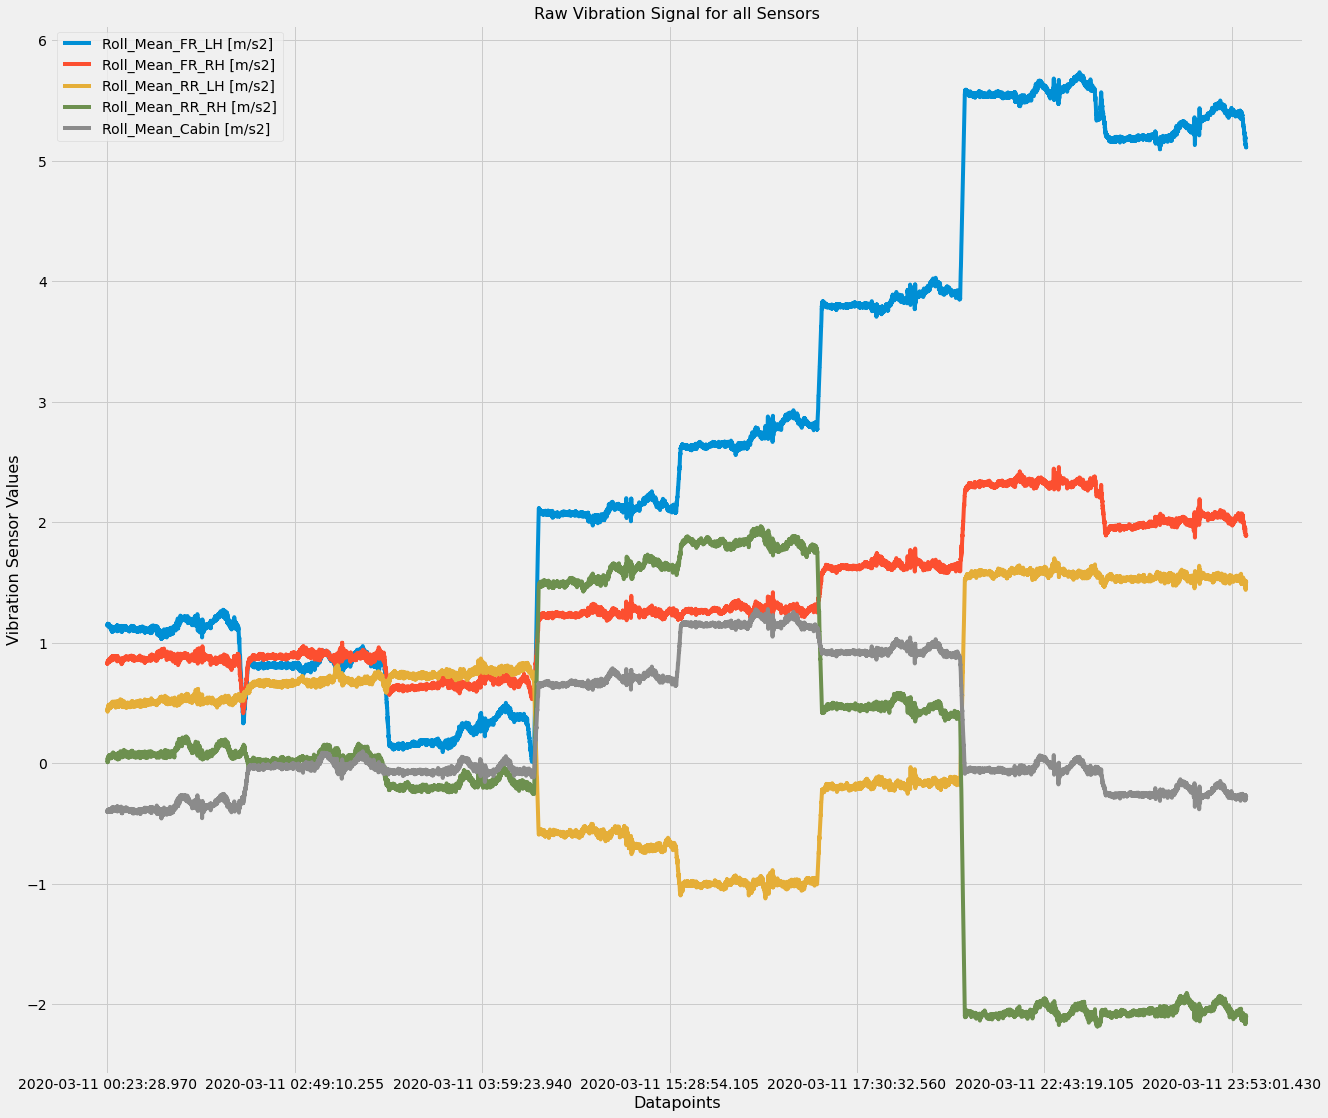

In [73]:
plt.style.use('fivethirtyeight')
ax = data_test2.plot(figsize=(20,18), subplots=False)
ax.set_xlabel('Datapoints', fontsize=16)
ax.set_ylabel('Vibration Sensor Values', fontsize=16)
ax.set_title('Raw Vibration Signal for all Sensors', fontsize=16)
plt.show()

In [74]:
data_test_march_columns = data_test2.columns
data_test_march_columns

Index(['Roll_Mean_FR_LH [m/s2]', 'Roll_Mean_FR_RH [m/s2]',
       'Roll_Mean_RR_LH [m/s2]', 'Roll_Mean_RR_RH [m/s2]',
       'Roll_Mean_Cabin [m/s2]'],
      dtype='object')

In [75]:
data_test_march=data_test2.values
print(data_test_march)

[[ 1.14836886  0.82961226  0.46211912  0.04715532 -0.3933903 ]
 [ 1.14705422  0.82869742  0.45945305  0.04563695 -0.39224022]
 [ 1.14259783  0.82677478  0.45858739  0.04464997 -0.39351013]
 ...
 [ 5.10910215  1.88946229  1.50136111 -2.1018575  -0.27893262]
 [ 5.1103456   1.88845149  1.50299034 -2.10125053 -0.28004876]
 [ 5.11033829  1.88612439  1.50329335 -2.09970869 -0.28116968]]


# Compile & fit Autoencoder model

In [76]:
input_dim = data_train.shape[1]

input_layer = Input(shape=(input_dim, ))

encoder1 = Dense(4, activation="tanh",
        activity_regularizer=regularizers.l1(10e-5),kernel_initializer='glorot_uniform')(input_layer)

# encoder2 = Dense(7, activation="relu",kernel_initializer='glorot_uniform')(encoder1)

encoder3 = Dense(2, activation='relu',kernel_initializer='glorot_uniform')(encoder1)

# decoder1 = Dense(7, activation='relu',kernel_initializer='glorot_uniform')(encoder3)

decoder2 = Dense(4, activation='tanh',kernel_initializer='glorot_uniform')(encoder3)

decoder3 = Dense(input_dim, kernel_initializer='glorot_uniform')(decoder2)

autoencoder = Model(inputs=input_layer, outputs=decoder3)

nb_epoch = 100
batch_size = 64

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
history=autoencoder.fit(data_train,data_train,
                  batch_size=batch_size, 
                  epochs=nb_epoch,
                  validation_split=0.15,
                  verbose = 1)

Epoch 1/100
1401/1401 [==============================] - 5s 3ms/step - loss: 0.1225 - val_loss: 0.0277
Epoch 2/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0171 - val_loss: 0.0344
Epoch 3/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0110 - val_loss: 0.0384
Epoch 4/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0053 - val_loss: 0.0090
Epoch 5/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0027 - val_loss: 0.0057
Epoch 6/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0024 - val_loss: 0.0043
Epoch 7/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 8/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 9/100
1401/1401 [==============================] - 4s 3ms/step - loss: 0.0020 - val_loss: 0.0040
Epoch 10/100
1401/1401 [==============================] - 4s 3ms/step - l

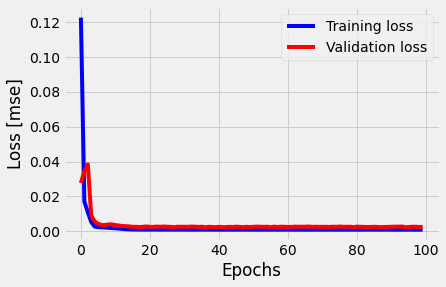

In [78]:
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss [mse]')
plt.show()

# Predict the results on train set

In [79]:
X_pred = autoencoder.predict(data_train)
X_pred = pd.DataFrame(X_pred, 
                      columns=data_vib1.columns)
X_pred.index = data_vib1.index

scored_train = pd.DataFrame(index=data_vib1.index)
scored_train['Loss_Train_MAE'] = np.mean(np.abs(X_pred-data_train), axis = 1)
scored_train

3295/3295 [==============================] - 7s 2ms/step


,Loss_Train_MAE
DateTime,
2020-02-25 16:44:08.040,0.042936
2020-02-25 16:44:08.045,0.041809
2020-02-25 16:44:08.050,0.040366
2020-02-25 16:44:08.055,0.039030
2020-02-25 16:44:08.060,0.038384
...,...
2020-02-25 15:22:49.850,0.042151
2020-02-25 15:22:49.855,0.042067
2020-02-25 15:22:49.860,0.041519


In [80]:
scored_train_asc = scored_train.sort_values(by=['Loss_Train_MAE'], ascending=False)
scored_train_asc

,Loss_Train_MAE
DateTime,
2020-02-25 15:23:34.980,0.099466
2020-02-25 15:23:34.960,0.099430
2020-02-25 15:23:35.015,0.099212
2020-02-25 15:23:34.985,0.099168
2020-02-25 15:23:35.000,0.099099
...,...
2020-02-25 16:19:45.150,0.001352
2020-02-25 16:19:45.170,0.001191
2020-02-25 16:19:45.165,0.001162


C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'MAE Loss for Smooth Training Data')

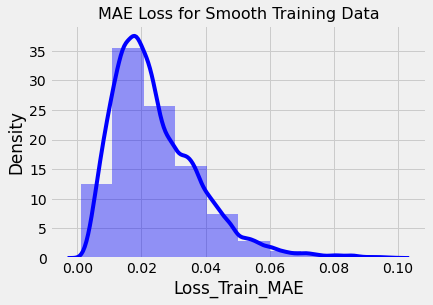

In [81]:
plt.figure()
ax=sns.distplot(scored_train['Loss_Train_MAE'],
             bins = 10, 
             kde= True,
            color = 'blue');
ax.set_title('MAE Loss for Smooth Training Data', fontsize=16)

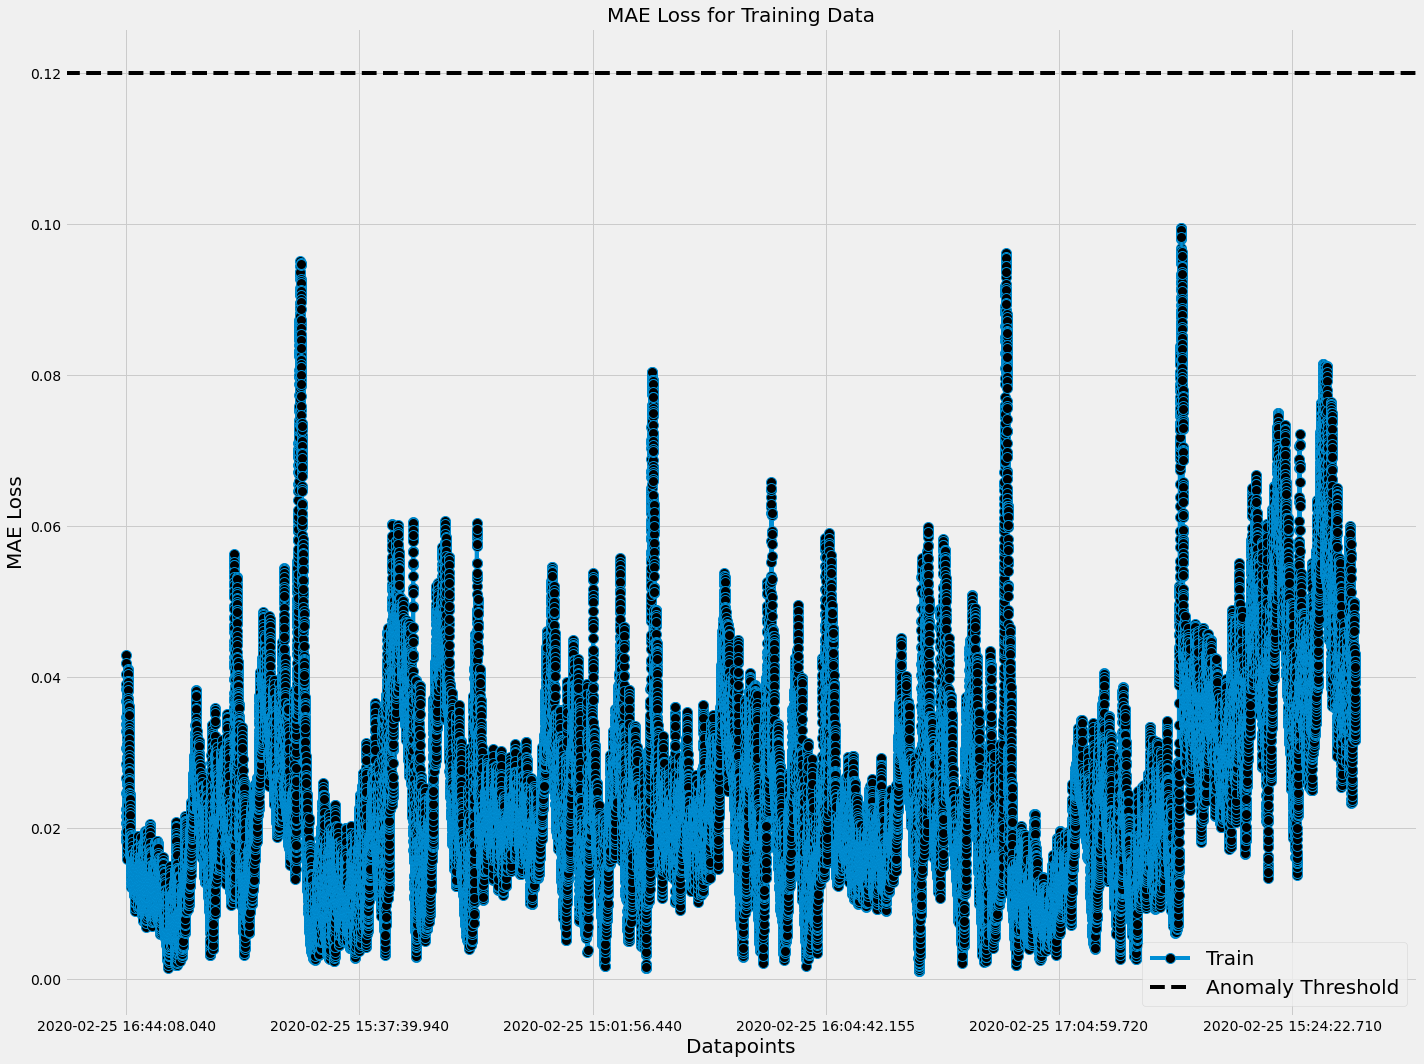

In [142]:
ax = scored_train['Loss_Train_MAE'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('MAE Loss', fontsize=20)
ax.set_title('MAE Loss for Training Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(0.12, color='k', linestyle='--')
ax.legend(("Train", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

# Predict the results on test 1 set

In [83]:
X_pred_test1 = autoencoder.predict(data_test_feb)
X_pred_test1 = pd.DataFrame(X_pred_test1, 
                      columns=data_test1.columns)
X_pred_test1.index = data_test1.index

scored_test_feb = pd.DataFrame(index=data_test1.index)
scored_test_feb['Loss_TestFeb_MAE'] = np.mean(np.abs(X_pred_test1-data_test_feb), axis = 1)
scored_test_feb_asc = scored_test_feb.sort_values(by=['Loss_TestFeb_MAE'], ascending=False)
scored_test_feb_asc

3751/3751 [==============================] - 7s 2ms/step


,Loss_TestFeb_MAE
DateTime,
2020-02-25 16:32:47.695,0.140325
2020-02-25 16:32:47.690,0.140134
2020-02-25 16:32:47.675,0.140054
2020-02-25 16:32:47.660,0.139649
2020-02-25 16:32:47.680,0.139569
...,...
2020-02-25 15:44:40.855,0.002525
2020-02-25 15:44:40.860,0.002521
2020-02-25 15:44:40.850,0.002291


C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


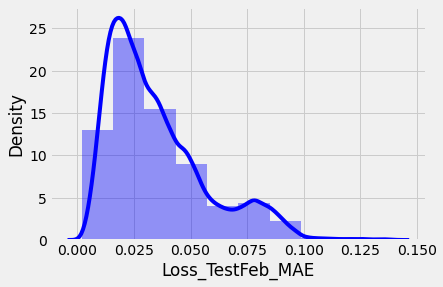

In [84]:
plt.figure()
sns.distplot(scored_test_feb['Loss_TestFeb_MAE'],
             bins = 10, 
             kde= True,
            color = 'blue');

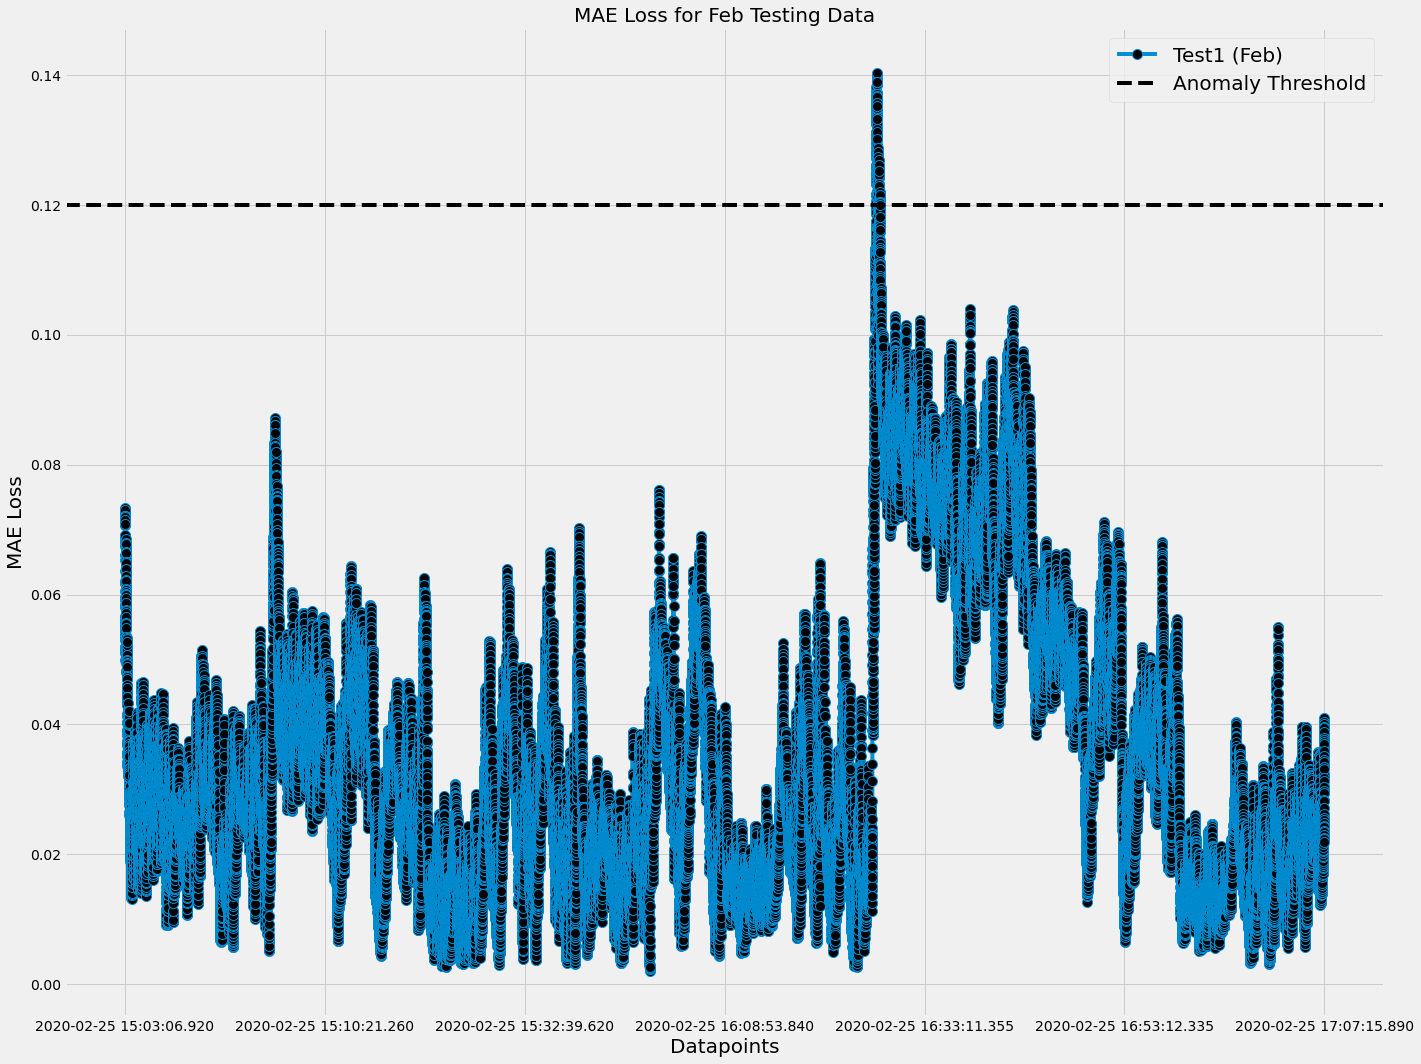

In [143]:
ax = scored_test_feb['Loss_TestFeb_MAE'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('MAE Loss', fontsize=20)
ax.set_title('MAE Loss for Feb Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(0.12, color='k', linestyle='--')
ax.legend(("Test1 (Feb)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

# Predict the results on test 2 set

In [86]:
X_pred = autoencoder.predict(data_test_march)
X_pred = pd.DataFrame(X_pred, 
                      columns=data_test2.columns)
X_pred.index = data_test2.index

scored_test_march = pd.DataFrame(index=data_test2.index)
scored_test_march['Loss_TestMarch_MAE'] = np.mean(np.abs(X_pred-data_test_march), axis = 1)
scored_test_march_asc = scored_test_march.sort_values(by=['Loss_TestMarch_MAE'], ascending=False)
scored_test_march_asc

3799/3799 [==============================] - 14s 4ms/step


,Loss_TestMarch_MAE
DateTime,
2020-03-11 16:30:31.345,1.461549
2020-03-11 16:30:31.340,1.461395
2020-03-11 16:30:31.335,1.458727
2020-03-11 16:30:31.350,1.457693
2020-03-11 16:30:31.330,1.455696
...,...
2020-03-11 15:26:17.875,0.143934
2020-03-11 15:26:17.865,0.143652
2020-03-11 15:26:17.895,0.143649


C:\Users\Khyati.Thakkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


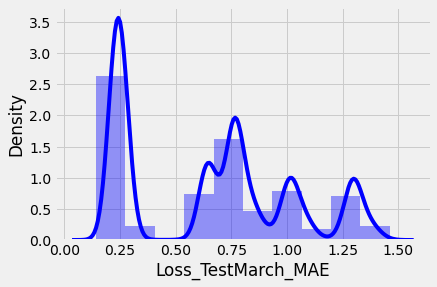

In [87]:
plt.figure()
sns.distplot(scored_test_march['Loss_TestMarch_MAE'],
             bins = 10, 
             kde= True,
            color = 'blue');

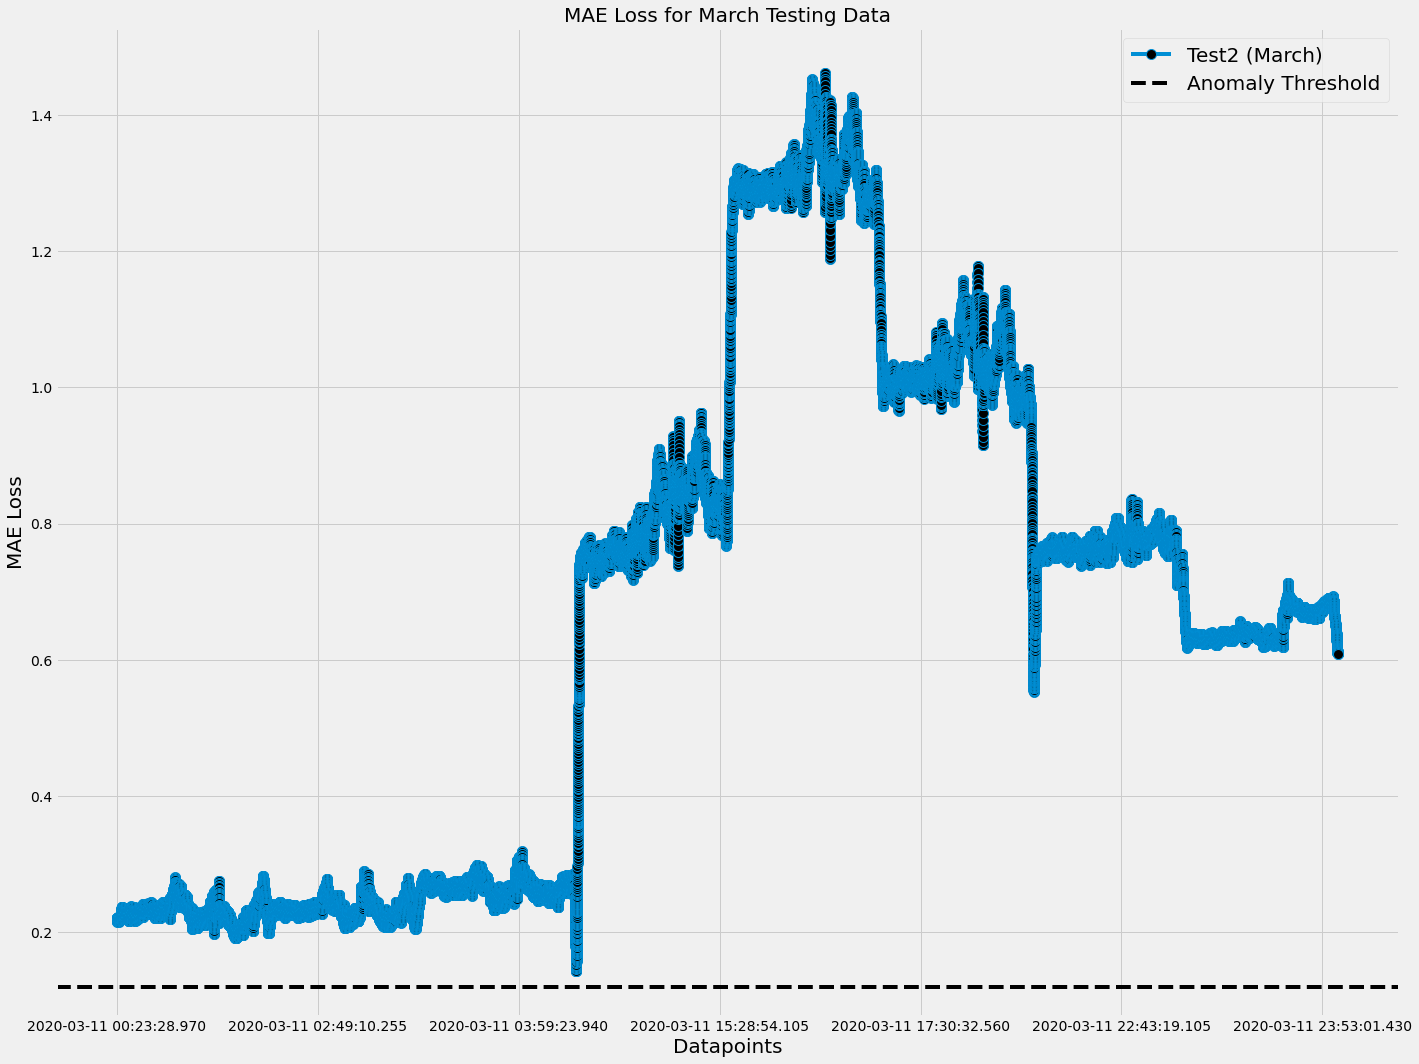

In [144]:
ax = scored_test_march['Loss_TestMarch_MAE'].plot(figsize=(20,15), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('MAE Loss', fontsize=20)
ax.set_title('MAE Loss for March Testing Data', fontsize=20)
ax.legend(fontsize=20)
plt.axhline(0.12, color='k', linestyle='--')
ax.legend(("Test2 (March)", "Anomaly Threshold"), fontsize=20)
plt.tight_layout()

# Compare and plot predictions on both the test sets (Test 1 & Test 2)

In [139]:
test_feb = scored_test_feb[['Loss_TestFeb_MAE']].reset_index()
test_march = scored_test_march[['Loss_TestMarch_MAE']].reset_index()

In [140]:
graph = pd.concat([test_feb["Loss_TestFeb_MAE"], test_march["Loss_TestMarch_MAE"]] ,axis=1)
graph.columns = ['Test1 (Feb)', 'Test2 (March)']
graph

,Test1 (Feb),Test2 (March)
0,0.058334,0.216108
1,0.058205,0.215754
2,0.058155,0.216243
3,0.055888,0.216721
4,0.054326,0.216365
...,...,...
121537,NaN,0.610002
121538,NaN,0.609357
121539,NaN,0.609531
121540,NaN,0.609851


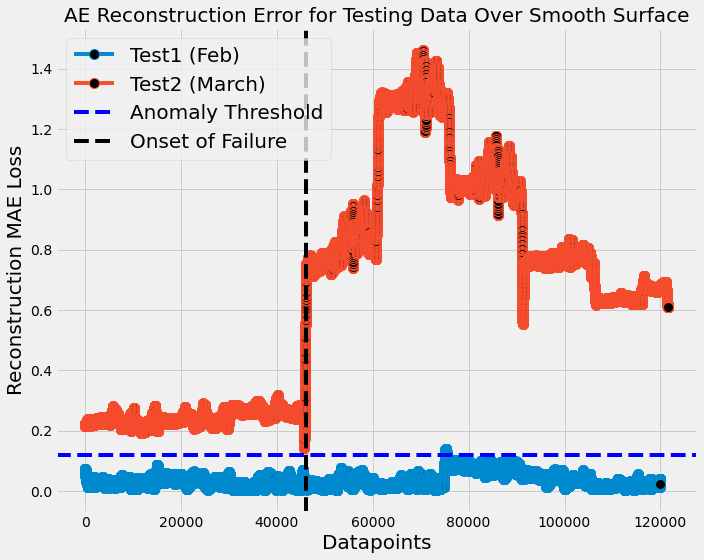

In [141]:
ax = graph.plot(figsize=(10,8), marker='o', markersize=10, markerfacecolor='black')
ax.set_xlabel('Datapoints', fontsize=20)
ax.set_ylabel('Reconstruction MAE Loss', fontsize=20)
ax.set_title('AE Reconstruction Error for Testing Data Over Smooth Surface', fontsize=20)
ax.legend(fontsize=20) # using a size in points
plt.axhline(0.12, color='blue', linestyle='--')
plt.axvline(46040, color='black', linestyle='--')
ax.legend(("Test1 (Feb)", "Test2 (March)", "Anomaly Threshold", "Onset of Failure"), fontsize=20)
plt.tight_layout()